In [17]:
from scipy import *
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

In [288]:
Omega_0 = 5*1e-4 #m
Lambda = 903 * 1e-9 #m
pi = np.pi
#z = list(range(1,1001))
z = np.linspace(0,100,num=100)#list(map(lambda x: float(x) / 1000, z))
r_0=10*1e-6
k = 2*pi/Lambda
E_0= 1.0*1e6


Omega = [0] * len(z)
R = [0] * len(z)
Phi = [0] * len(z)
U_z = [0] * len(z)

E = [0] * len(z)

In [289]:
def Omega_z(z):
    return Omega_0 * np.sqrt(1 + ((Lambda*z)/(pi*Omega_0**2))**2)

def R_z(z):
    return z*(1+((pi*Omega_0**2)/(Lambda*z))**2)

def Phi_z(z):
    return np.arctan((Lambda*z)/(pi*Omega_0**2))

In [290]:
for i in range(len(z)):
    Omega[i] = Omega_z(z[i])
    R[i] = R_z(z[i])
    Phi[i] = Phi_z(z[i])
    U_z[i] = (Omega_0/Omega[i]*np.exp(-(r_0/Omega[i])**2)*np.exp(1j*Phi[i]).real*np.exp(-1j*(k/(2*R[i]))*r_0**2).real)
    E[i] = E_0 * U_z[i] * np.exp(-1j*k*z[i]).real

In [291]:
#r = list(range(-100001,1000001))
r = np.linspace(-0.1,0.1,num=10000)#list(map(lambda x: float(x) / 100, z))
U_r = [0] * len(r)
for j in range(len(r)):
    i=99
    U_r[j] = (Omega_0/Omega[i]*np.exp(-(r[j]/Omega[i])**2)*np.exp(1j*Phi[i]).real*np.exp(-1j*(k/(2*R[i])).real*r[j]**2))

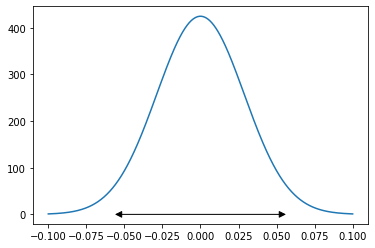

In [292]:
plt.plot(r,np.abs(U_r/U_r[0])**2)
#plt.ylim(-5e-8,5e-8)
plt.annotate('', (-Omega[i], 0), (Omega[i], 0), zorder=10, ha='center', size=14,
              arrowprops=dict(arrowstyle='<|-|>', 
                            connectionstyle='arc3', 
                            facecolor='k', 
                            edgecolor='k'))

plt.show()

In [293]:
def Theata_z(Lambda):
    return 2*np.arctan((Lambda)/(pi*Omega_0))

In [294]:
theta=Theata_z(903*1e-9)
print("{:f} rad".format(theta))
print("{:f} deg".format(theta*180/pi))

0.001150 rad
0.065875 deg


In [295]:
100*np.tan(theta)

0.11497356888522474

In [296]:
100*np.tan(3*1e-3*0.5)

0.15000011250010126

In [297]:
100*np.tan(1.5*1e-3*0.5)

0.07500001406250317

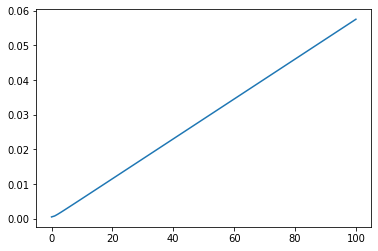

In [260]:
plt.plot(z,Omega)